# ARTIFICIAL NEURAL NETWORKS

Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

Overview

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

Dataset: "Alphabets_data.csv"

The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying 
different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.

Tasks

1. Data Exploration and Preprocessing

●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.

●	Execute necessary data preprocessing steps including data normalization, managing missing values.

2. Model Implementation

●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

●	Divide the dataset into training and test sets.

●	Train your model on the training set and then use it to make predictions on the test set.

3. Hyperparameter Tuning

●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.

4. Evaluation

●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


## Answer

In [2]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install tensorflow

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\Alphabets_data.csv")
df

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [6]:
# Check for null values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
# Check for duplicates
df.duplicated().sum()

1332

In [8]:
# Remove duplicates to remove bias
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

xbox          ybox         width        height         onpix  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       4.150793      7.244322      5.279891      5.506910      3.660596   
std        1.879428      3.187660      1.934960      2.178292      2.160555   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      8.000000      5.000000      6.000000      3.000000   
75%        5.000000     10.000000      6.000000      7.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.919381      7.529409      4.584637      5.201361      8.353171   
std        2.032226      2.319834      2.625714      2.320102      2.468905   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             x2ybar        xy2bar         xedge        xedgey         yedge  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.452700      7.924577      3.131455      8.351832      3.796872   
std        2.624673      2.106957      2.323901      1.574853      2.540271   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      7.000000      2.000000      8.000000      2.000000   
50%        6.000000      8.000000      3.000000      8.000000      4.000000   
75%        8.000000      9.000000      4.000000      9.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             yedgex  
count  18668.000000  
mean       7.784390  
std        1.657358  
min        0.000000  
25%        7.000000  
50%        8.000000  
75%        9.000000  
max       15.000000

<Axes: xlabel='count', ylabel='letter'>

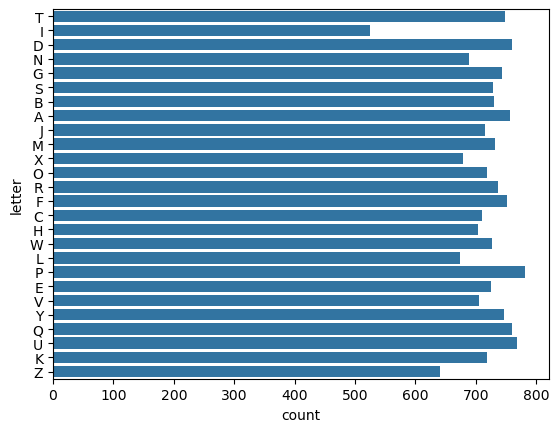

In [10]:
# Checking distribution of target classes
sns.countplot(df["letter"])

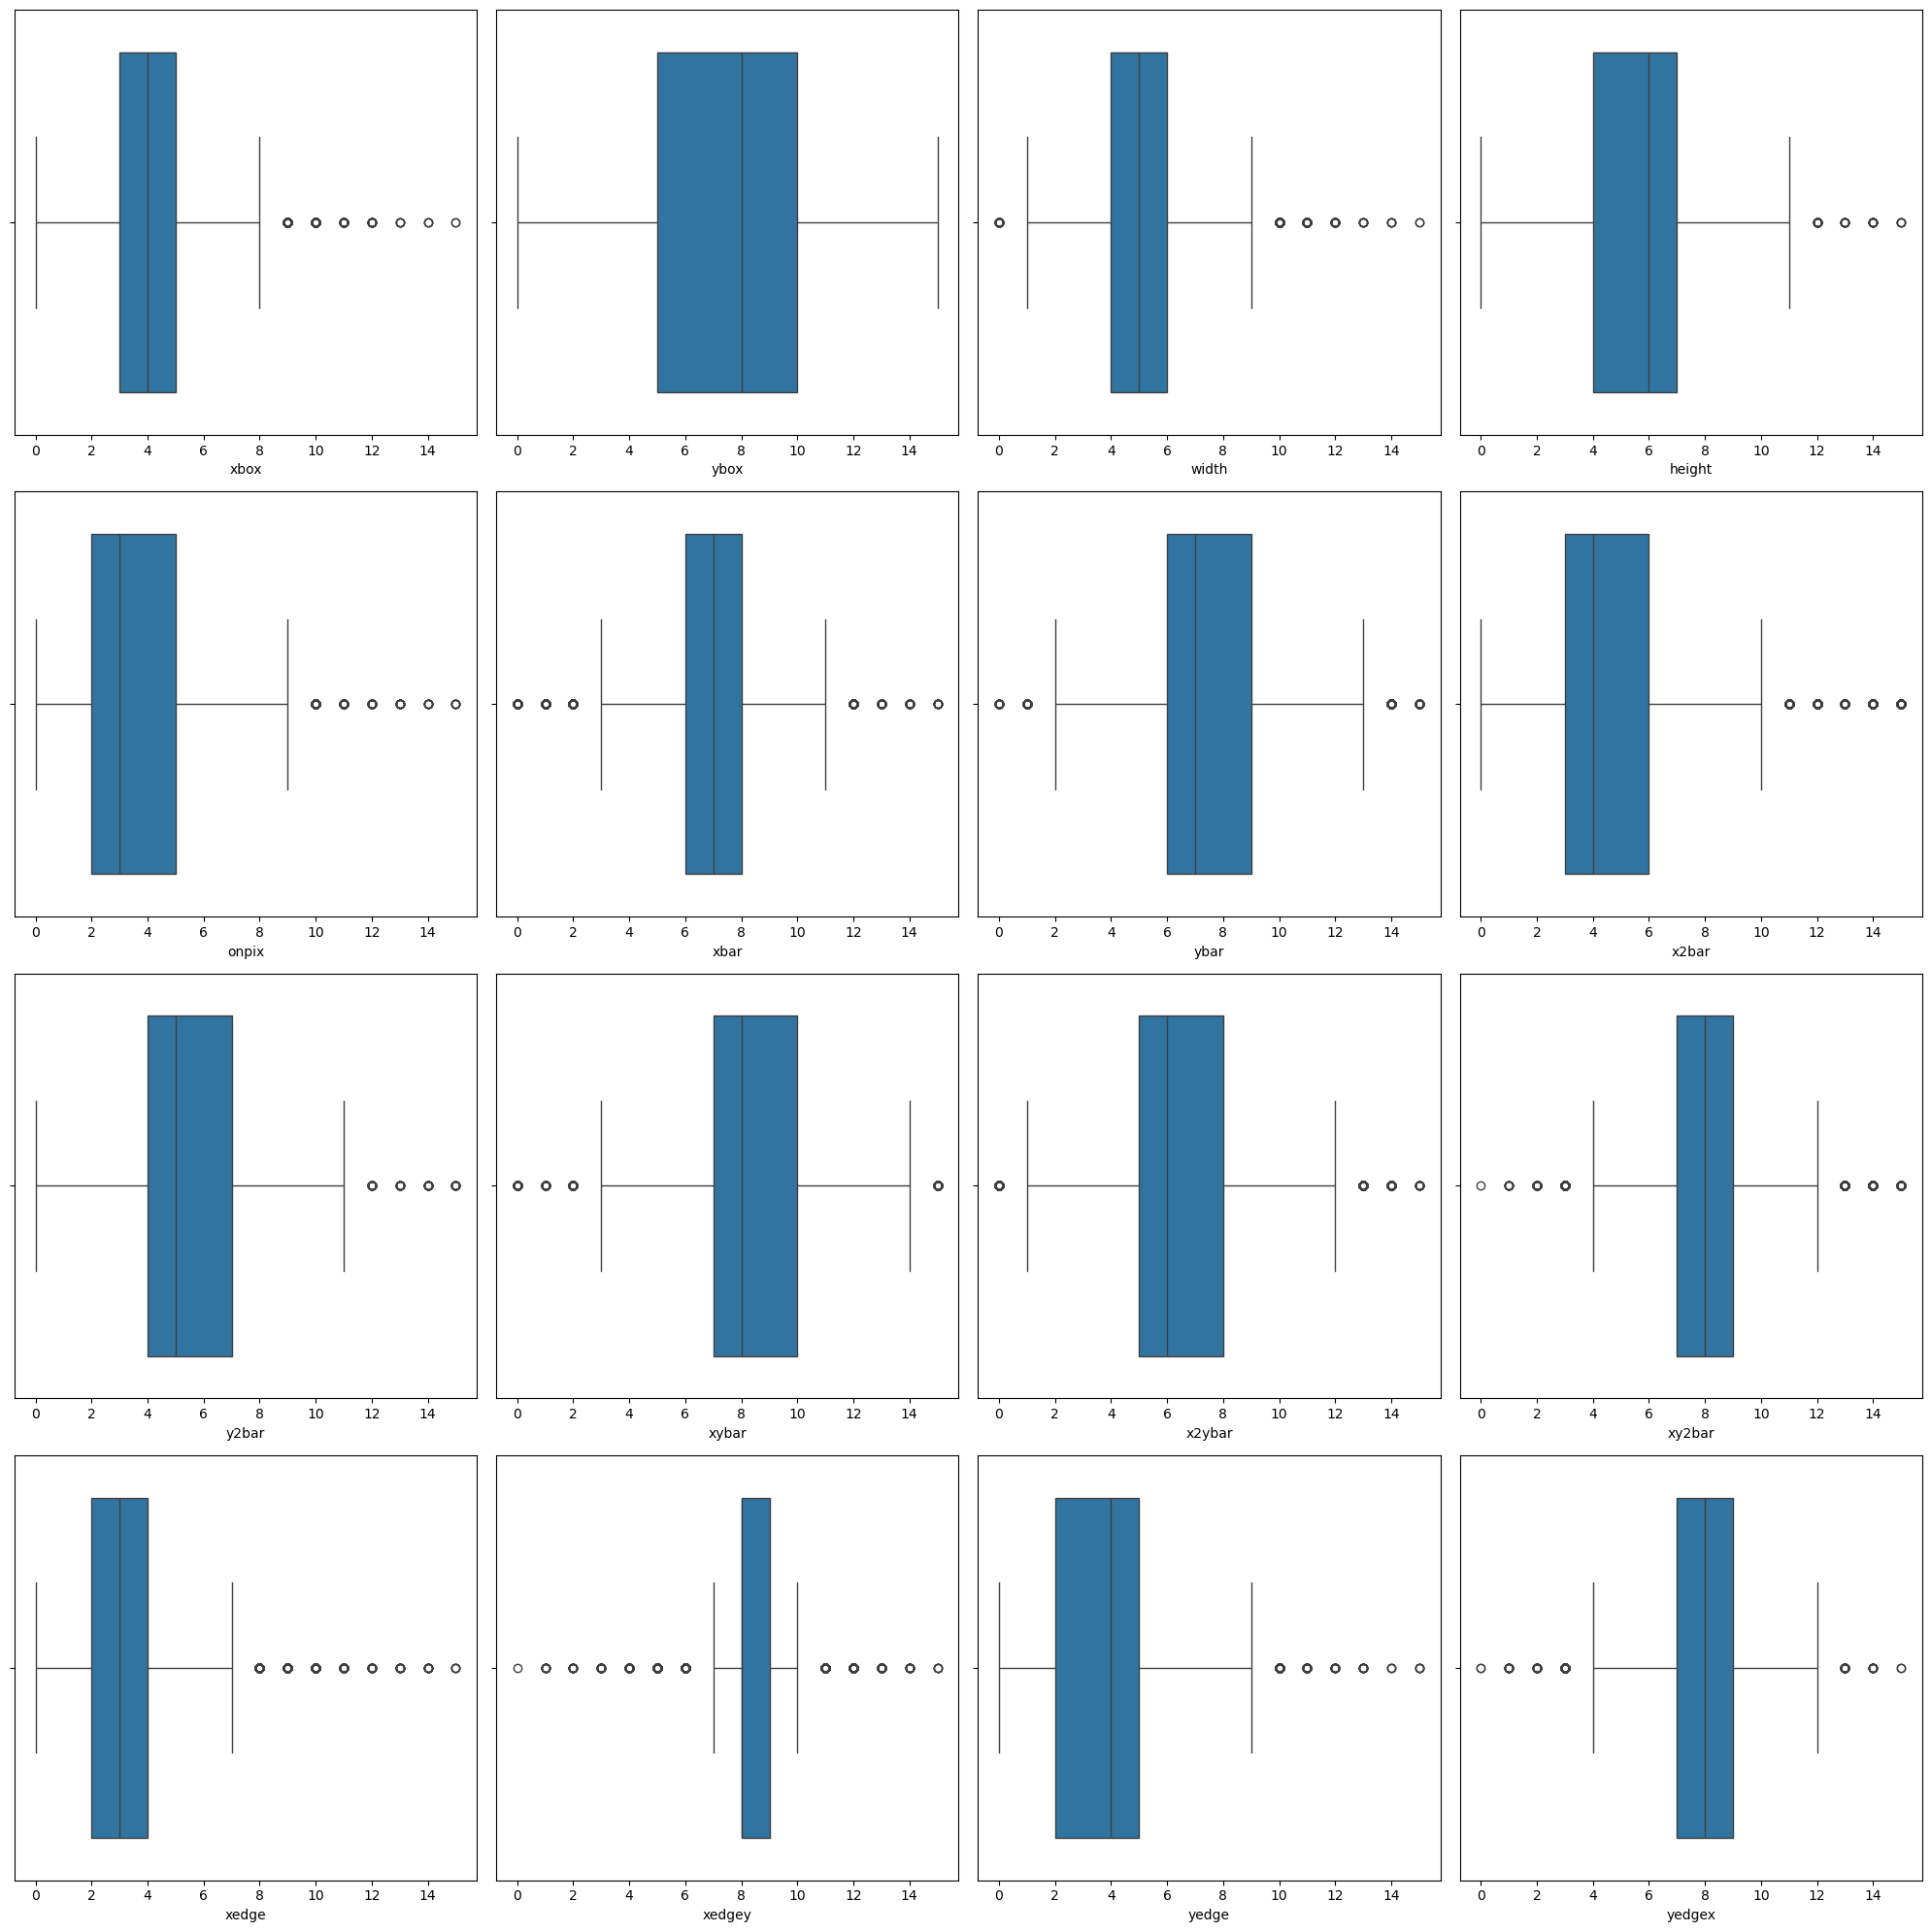

In [11]:
# Plotting boxplots to check the distribution of numerical columns
cols = df.columns[1:].tolist()  # Exclude the last column
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns for the subplots
r = c = 0
for col in cols:
    sns.boxplot(x=col, data=df, ax=ax[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

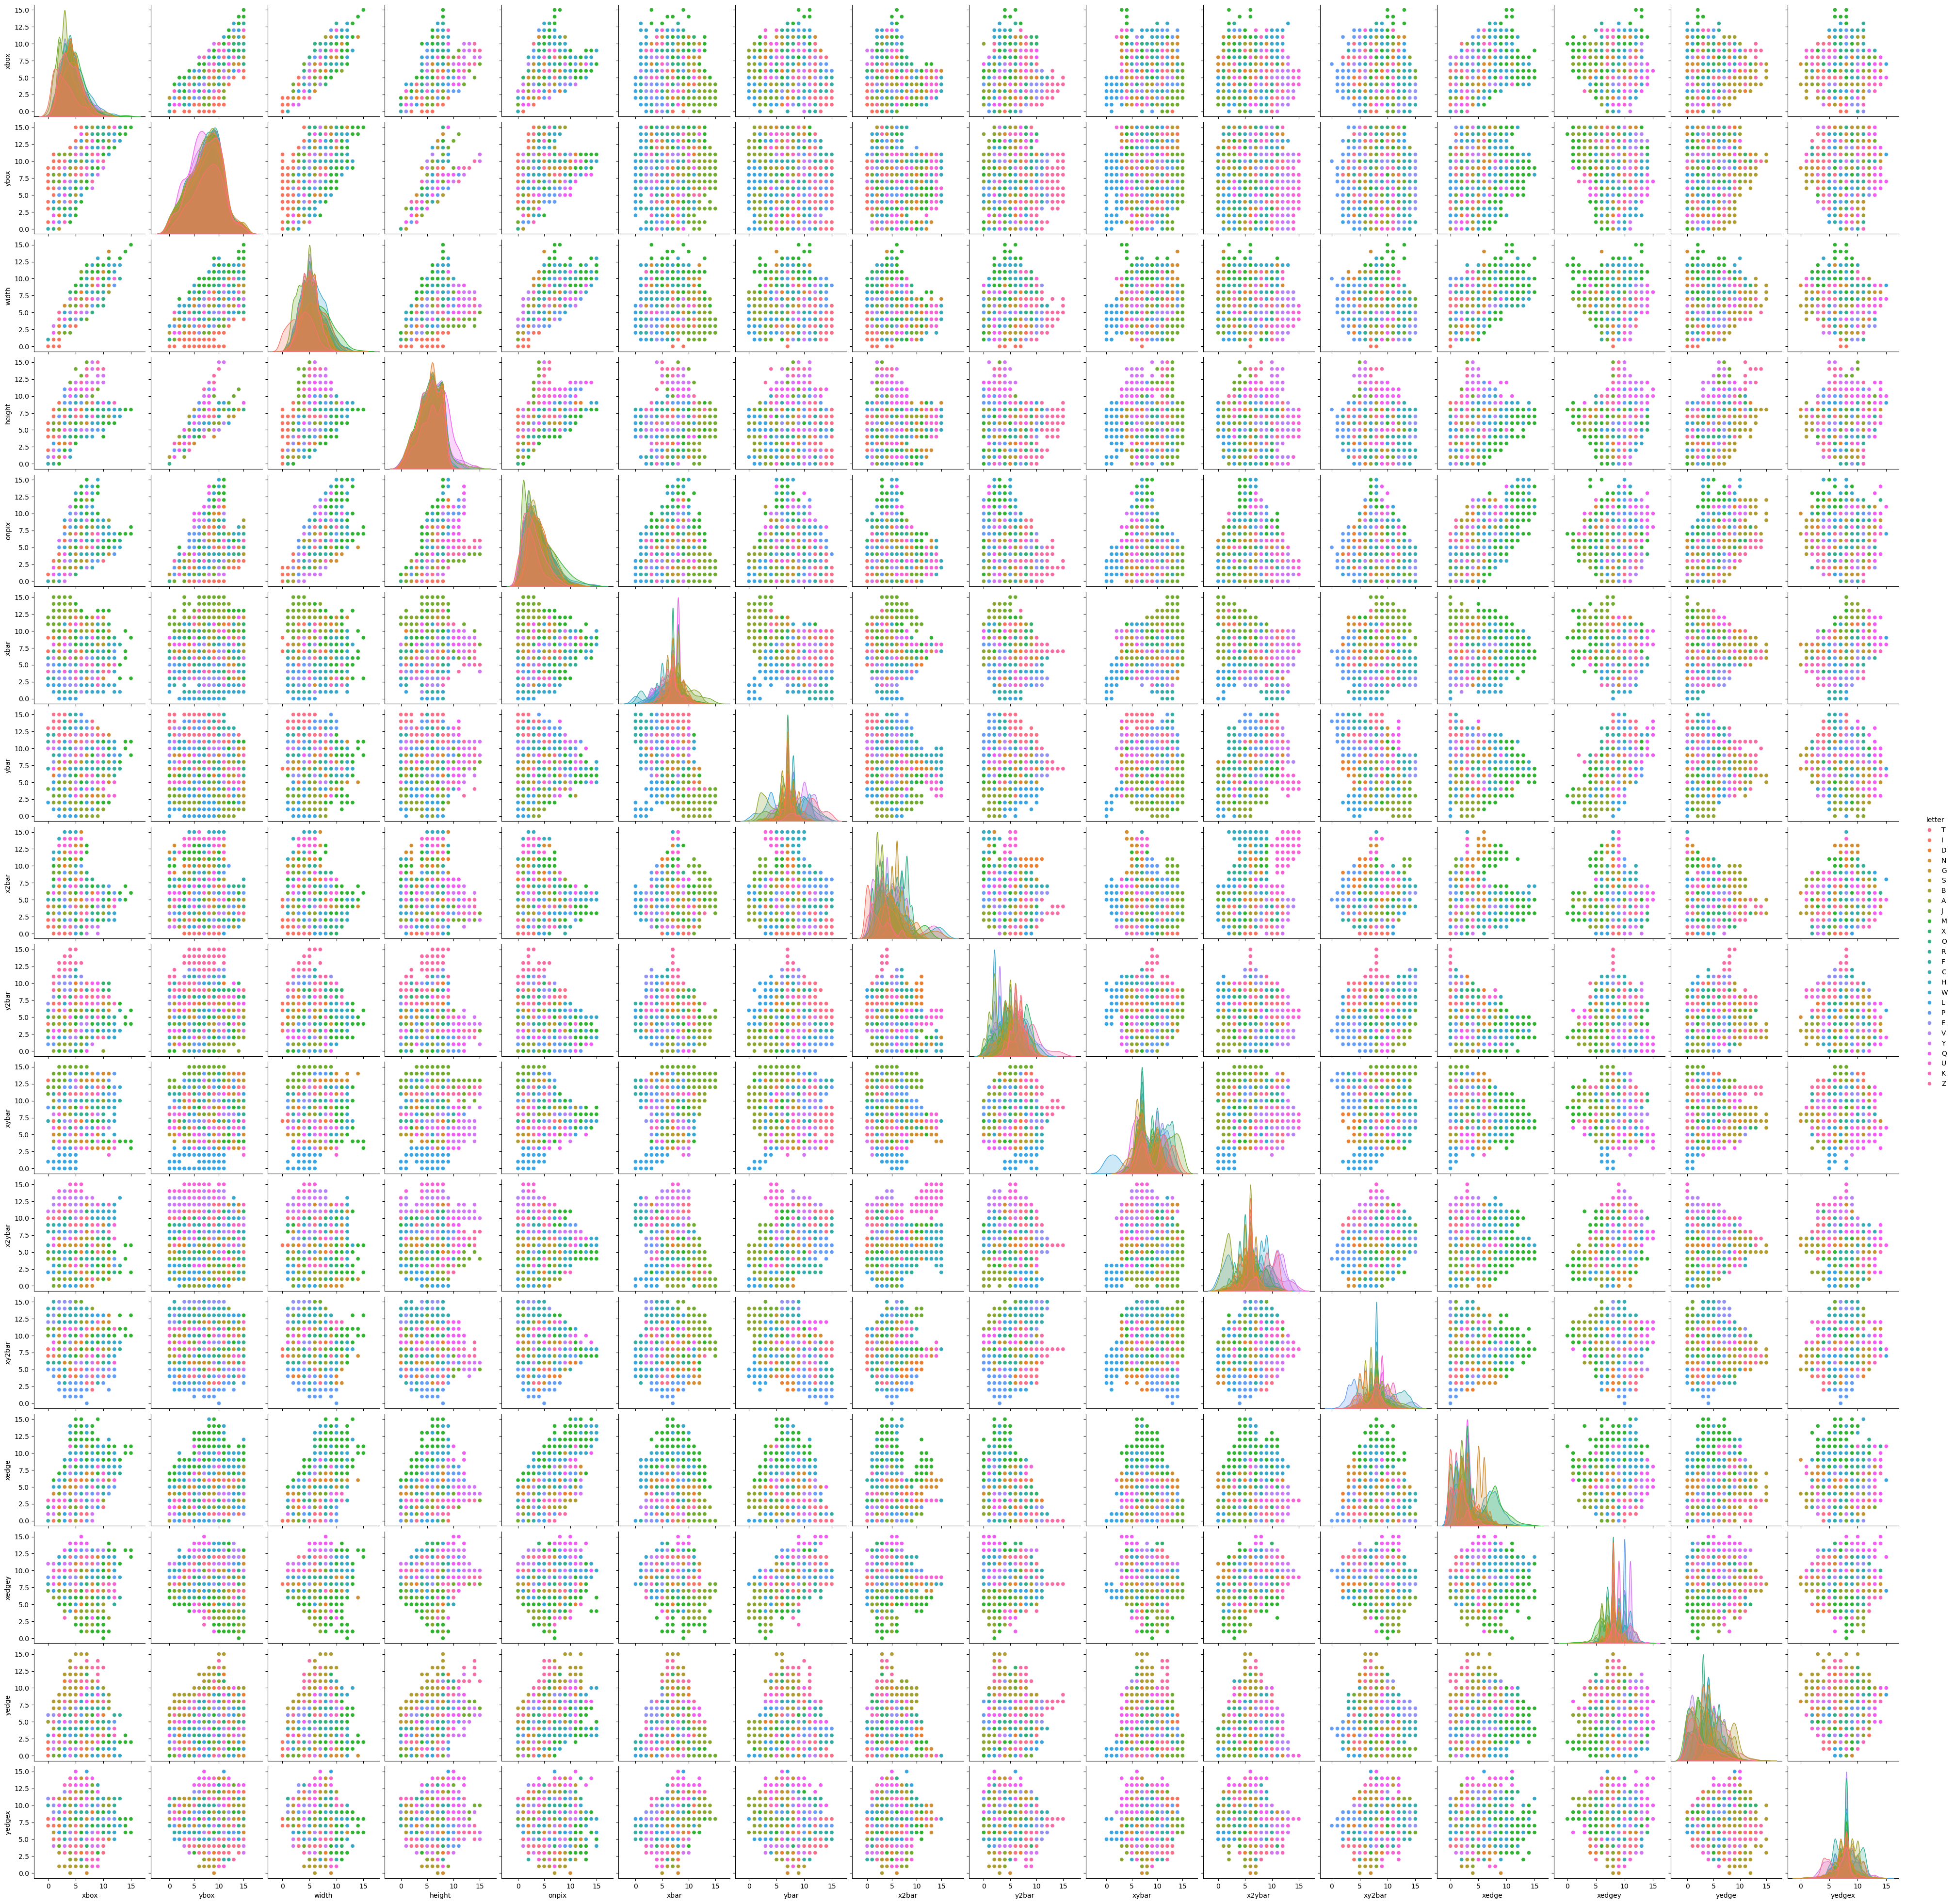

In [12]:
# Visualizing numerical columns clustered based on species
sns.pairplot(df,hue='letter')

In [14]:
# Train-test split

X = df.drop('letter',axis=1).values
# Since this ia a multiclass-classification, output labels are one-hot encoded for training the ANN
y = pd.get_dummies(df['letter']).values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state=101)

In [16]:
# Performing min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=10, batch_size=32, verbose=0):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

# Define your Keras model function
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Use the custom wrapper
model = KerasClassifierWrapper(build_fn=create_model, epochs=10, batch_size=10, verbose=0)


In [36]:
# input_shape
X_train_scaled.shape[1:]

(16,)

In [37]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  ''' 
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model

In [40]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your Keras model function
def build_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create KerasClassifierWrapper instance
keras_cls = KerasClassifierWrapper(build_fn=build_model, epochs=10, batch_size=10, verbose=0)

# Fit the model
keras_cls.fit(X_train, y_train)

# Predict and evaluate
y_pred = keras_cls.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Accuracy: 0.875


In [43]:
# Hyperparameter tuning

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
    "n_hidden" : (2,3),
    "n_neurons" : tuple(range(2,7)),
    "learning_rate" : (3e-2,3e-3,3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

In [44]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create synthetic dataset (adjust as necessary for your use case)
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=42)

# Verify data shapes
print("Initial shape of X:", X.shape)
print("Initial shape of y:", y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes after split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Initial shape of X: (1000, 8)
Initial shape of y: (1000,)
Shape of X_train: (800, 8)
Shape of y_train: (800,)
Shape of X_test: (200, 8)
Shape of y_test: (200,)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load example data
data = load_iris()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameters for RandomizedSearchCV
model = RandomForestClassifier()
param_distributions = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize and fit RandomizedSearchCV
model_cv = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=5, verbose=2, random_state=42)
model_cv.fit(X_train, y_train)

# Access the best parameters
print("Best Parameters:", model_cv.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END .max_depth=10, min_sampl

In [48]:
model_cv.best_score_

0.95

In [54]:
def build_model(n_hidden=1, n_neurons=10):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=4, activation='relu'))  # Example input_dim=4
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Example output_dim=3
    optimizer = Adam()  # No learning_rate parameter
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Adjusted call
best_set = model_cv.best_params_

model = build_model(
    n_hidden=best_set.get('n_hidden', 1), 
    n_neurons=best_set.get('n_neurons', 10)
)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are defined

# Re-split the data ensuring the sizes match
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the split sizes match
if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("Mismatch in training data after split")

if X_test.shape[0] != y_test.shape[0]:
    raise ValueError("Mismatch in test data after split")

# Proceed with scaling or other preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can fit your model
model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=10)],
    verbose=0
)


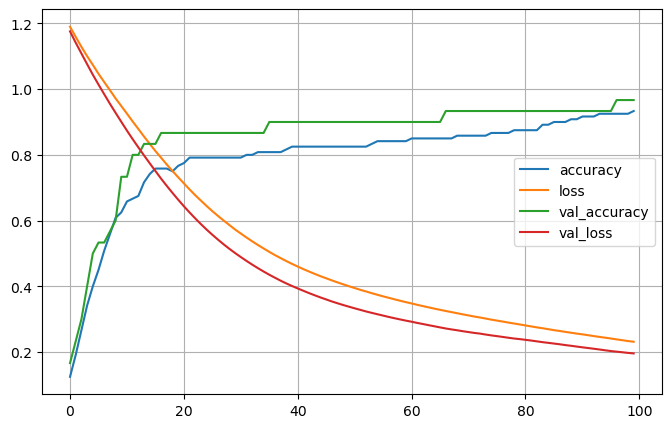

In [59]:
# Plotting accuracy, loss of train and validation set
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [66]:
print("y_test_classes shape:", y_test_classes.shape)  # Should be (number_of_samples,)
print("pred_classes shape:", pred_classes.shape)      # Should be (number_of_samples,)


y_test_classes shape: ()
pred_classes shape: (30,)
